In [1]:
import random
import numpy as np
import pandas as pd
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
class Visualizer:
    ignore_tags = ['masked', 'excluded-region', 'maintable', 'stamp']
    def __init__(self, img_dir, json_path):
        self.img_dir = img_dir
        self.json_path = json_path
        self.img_list = glob.glob(os.path.join(img_dir, '*.jpg'))

    def __call__(self, idx):
        with open(self.json_path, 'r') as json_reader:
            dataset = json.load(json_reader)
        
        img = cv2.imread(self.img_list[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        for words in dataset['images'][self.img_list[idx].split('/')[-1]]['words'].values():
            
            ignore_flag = any(elem for elem in words['tags'] if elem in self.ignore_tags)                

            if ignore_flag:
                continue
            
            bbox = np.array(words['points'], dtype=np.int32)
            img = cv2.polylines(img, [bbox], True, (255,30,30),2)

        plt.figure(figsize=(12,12))
        plt.imshow(img)

In [3]:
#경로설정
img_dir = '/opt/ml/input/data/medical/img/train'
json_path = '/opt/ml/input/data/medical/ufo/train.json'

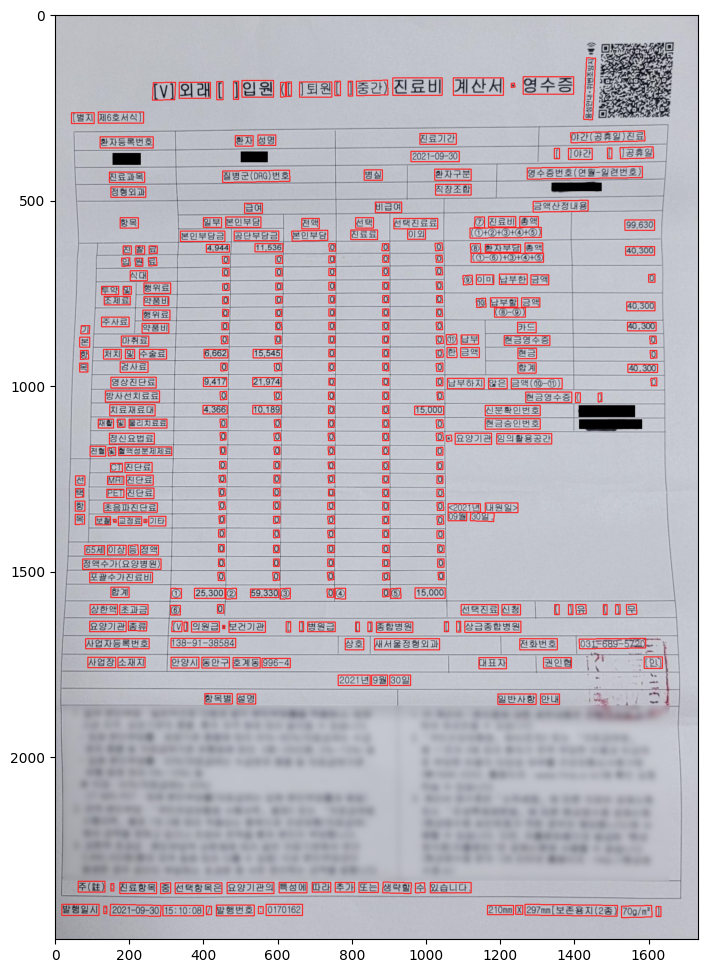

In [4]:
vis = Visualizer(img_dir, json_path)

#인자로 0~99
vis(10)